In [252]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import h5py
%matplotlib inline

In [124]:
freqs = []
before_fiber = []
with open("/home/lattice/Desktop/before_fiber_sp_20200110.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs.append(float(row[0]))
        before_fiber.append(float(row[1]))
before_fiber = np.array(before_fiber)

In [125]:
freqs2 = []
after_fiber = []
with open("/home/lattice/Desktop/after_fiber_sp_20200110.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs2.append(float(row[0]))
        after_fiber.append(float(row[1]))
after_fiber = np.array(after_fiber)

In [126]:
freqs3 = []
before_fiber_compact = []
with open("/home/lattice/Desktop/before_fiber_compact_sp_20200113.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs3.append(float(row[0]))
        before_fiber_compact.append(float(row[1]))
before_fiber_compact = np.array(before_fiber_compact)

In [127]:
freqs4 = []
after_fiber_compact = []
with open("/home/lattice/Desktop/after_fiber_compact_sp_20200113.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs4.append(float(row[0]))
        after_fiber_compact.append(float(row[1]))
after_fiber_compact = np.array(after_fiber_compact)

In [128]:
before_fiber /= np.max(before_fiber)
after_fiber /= np.max(after_fiber)
before_fiber_compact /= np.max(before_fiber_compact)
after_fiber_compact /= np.max(after_fiber_compact)

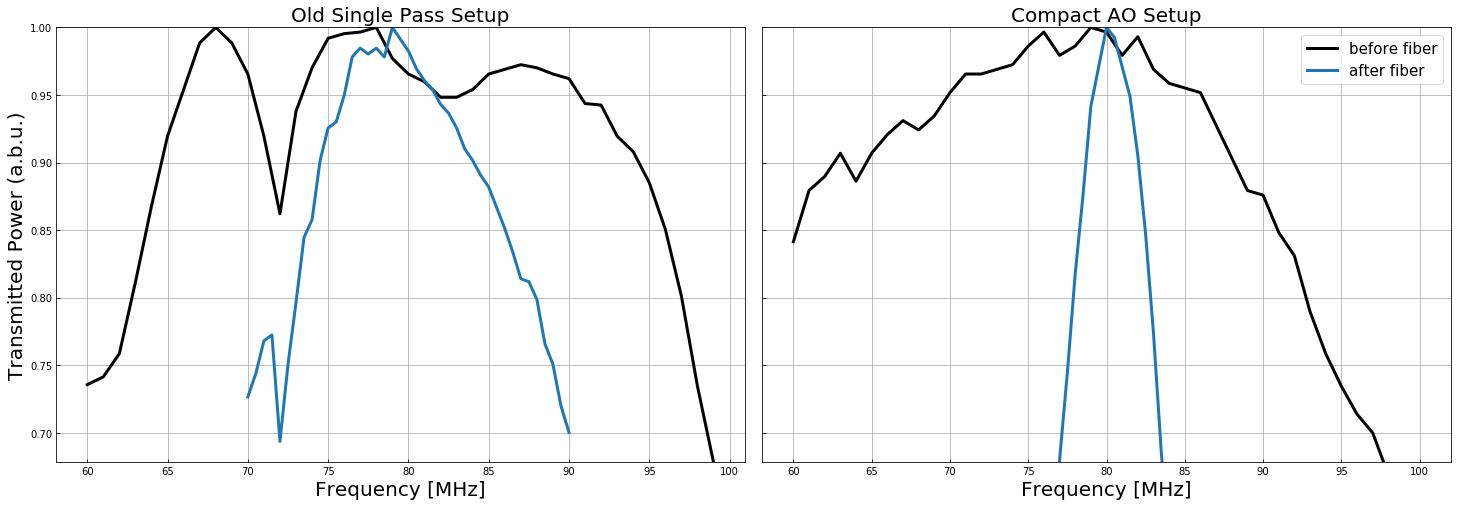

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(25,8), sharey=True)
ax[0].plot(freqs, before_fiber, color="k", label="before fiber", lw=3)
ax[0].plot(freqs2, after_fiber, color="C0", label="after fiber", lw=3)
ax[1].plot(freqs3, before_fiber_compact, color="k", label="before fiber", lw=3)
ax[1].plot(freqs4, after_fiber_compact, color="C0", label="after fiber", lw=3)
ax[0].set_ylim(np.min(list(before_fiber) + Clist(after_fiber)), 1)
ax[0].set_xlabel("Frequency [MHz]", fontsize=20)
ax[0].set_ylabel("Transmitted Power (a.b.u.)", fontsize=20)
ax[1].legend(fontsize=15)
ax[0].set_title("Old Single Pass Setup", fontsize=20)
ax[1].set_title("Compact AO Setup", fontsize=20)
ax[1].set_xlabel("Frequency [MHz]", fontsize=20)
plt.subplots_adjust(wspace=0.025, hspace=0.025)
ax[0].tick_params(which="both", direction="in")
ax[1].tick_params(which="both", direction="in")
ax[0].grid(True)
ax[1].grid(True)
plt.savefig("/home/lattice/Desktop/beam_path_comparisons.png")
plt.show()

In [333]:
t = np.linspace(0, 4, 100)
tultra = np.linspace(0, 4, 1000)
def f(Ω, t):
    return np.sin(2 * np.pi * Ω * t)**2

In [359]:
Ω_02 = np.random.normal(1, 0.01, 1000)
y_02 = [0 for i in range(100)]
for ω in Ω_02:
    y_02 += f(ω, t)
y_02 /= 1000

Ω_06 = np.random.normal(1, 0.05, 1000)
y_06 = [0 for i in range(100)]
for ω in Ω_06:
    y_06 += f(ω, t)
y_06 /= 1000

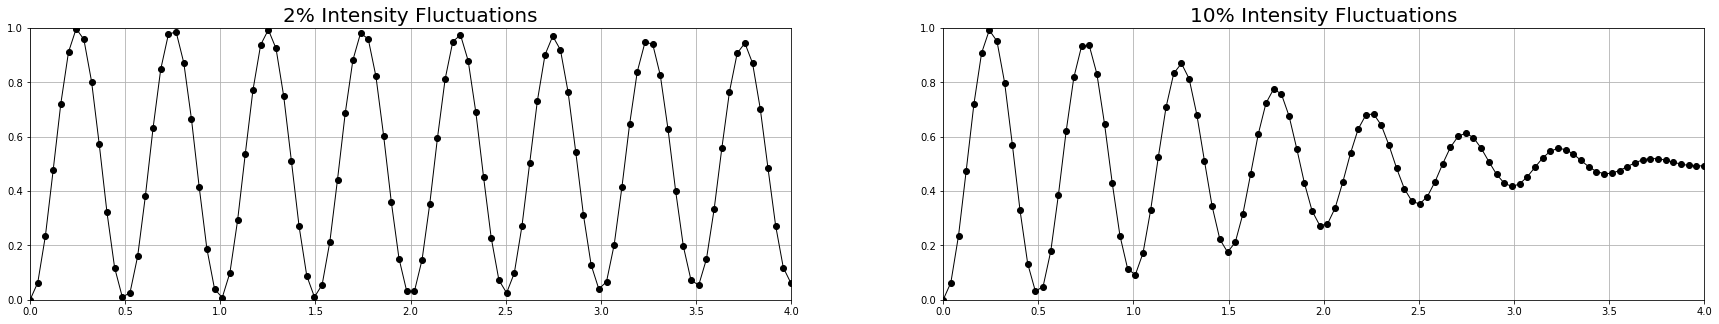

In [360]:
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
# ax.plot(tultra, f(Ω[0], tultra))
ax[0].plot(t, y_02, marker="o", lw=1, color="k")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(0, 4)
ax[0].grid(True)
ax[0].set_title("2% Intensity Fluctuations", fontsize=20)
ax[1].plot(t, y_06, marker="o", lw=1, color="k")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 4)
ax[1].grid(True)
ax[1].set_title("10% Intensity Fluctuations", fontsize=20)
plt.savefig("/home/lattice/Desktop/sumanta_plot.pdf")
plt.show()

In [237]:
with h5py.File("/home/lattice/data/2020-01-21/RabiFlopping/2246_16.h5", 'r') as f:
    # List all groups
    x = f["scan_data"]["RabiFlopping.duration"][:]
    y = f["scan_data"]["RabiFlopping-ion number:1"][:]


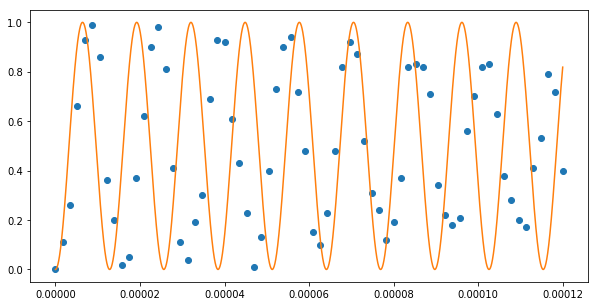

In [249]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, marker="o", lw=0)
tt = np.linspace(0, .00012, 10000)
ax.plot(tt, f(3.9e4, tt))

In [260]:
gS = 2; gD = 6/5
mD_minus = [-5/2 + j for j in range(5)]
mD_plus = [-3/2 + j for j in range(5)]
mS = [-1/2, 1/2]

S: -1/2; +1/2; +1/2

In [297]:
valsp = np.zeros([5,5])
for i in range(5):
    for j in range(5):
        A = gD * mD_minus[i] + gS * 1/2 + gS * 1/2
        B = gS * (-1/2) + gD * mD_plus[j] + gS * 1/2
        valsp[i,j] = np.abs(A-B)
            
valsm = np.zeros([5,5])
for i in range(5):
    for j in range(5):
        A = gD * mD_plus[i] + gS * -(1/2) + gS * (-1/2)
        B = gS * 1/2 + gD * mD_minus[j] + gS * (-1/2)
        valsm[i,j] = np.abs(A-B)

In [298]:
valsp

array([[0.8, 0.4, 1.6, 2.8, 4. ],
       [2. , 0.8, 0.4, 1.6, 2.8],
       [3.2, 2. , 0.8, 0.4, 1.6],
       [4.4, 3.2, 2. , 0.8, 0.4],
       [5.6, 4.4, 3.2, 2. , 0.8]])

In [299]:
valsm

array([[0.8, 2. , 3.2, 4.4, 5.6],
       [0.4, 0.8, 2. , 3.2, 4.4],
       [1.6, 0.4, 0.8, 2. , 3.2],
       [2.8, 1.6, 0.4, 0.8, 2. ],
       [4. , 2.8, 1.6, 0.4, 0.8]])

In [300]:
gD * (-1/2) + gS * (1/2) + gS * (1/2)

1.4

In [301]:
gS * (-1/2) + gD * (3/2) + gS * (1/2)

1.7999999999999998

In [303]:
valsp = np.zeros([5,5])
for i in range(5):
    for j in range(5):
        A = gD * mD_minus[i] + gS * 1/2 + gS * 1/2 + gS * 1/2
        B = gS * (-1/2) + gD * mD_plus[j] + gS * 1/2 + gS * 1/2
        valsp[i,j] = np.abs(A-B)

In [305]:
np.min(valsp)

0.3999999999999999

In [306]:
from scipy.constants import hbar
μB = 9.274e-24

In [316]:
def δf(B): return (μB/hbar) * 1e-4 * (4/5) * B / (2 * np.pi)

In [317]:
δf(1e-6)

1.1196983966683214

# Some Stuff wit Ramsey, joe



In [319]:
from scipy.optimize import curve_fit

In [321]:
import os

In [ ]:
def sin 

In [324]:
os.chdir("/home/lattice/data/2020-01-24/Ramsey")

In [327]:
with h5py.File("1242_40.h5", 'r') as f:
    # List all groups
    x = f["scan_data"]["Ramsey.wait_time"][:]
    y = f["scan_data"]["Ramsey-ion number:1"][:]


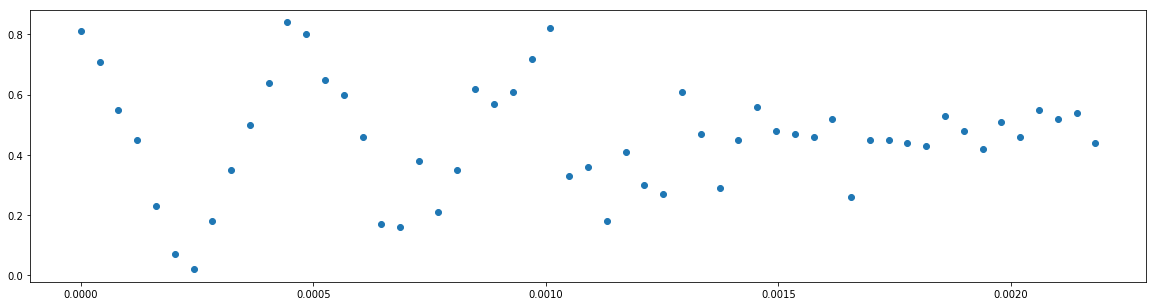

In [330]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(x, y, marker="o", lw=0)